# Exercice sur les métrique

Pour les exercices on va utiliser un jeu de données ou les observations seront des individus, les features des informations sur leurs santés et la target le fait d'avoir ou non le diabète.

Pour la target diabete : 
- 0 représente une personne n'ayant pas le diabète
- 1 représente une personne ayant le diabète

Dans le bout de code ci-dessous, on importe deux modèles différents que l'on entraine sur le dataset. On réalise également les prédictions des modèles sur le dataset pour le training set.
Les différents imports nécessaires pour les exercices sont également déjà fait.

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_predict

data = pd.read_csv("dataset/pima-indians-diabetes.data.csv", header=None,names=["pregnancies", "glucose", "blood_pressure", "skin_thickness", "insulin", "bmi", "diabete_pedigree", "age", "diabete"])

X = data.drop("diabete", axis=1)
y = data.diabete

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8, random_state=42, stratify=y)

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

y_train_pred_sgd = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
y_train_pred_rf = cross_val_predict(rf_clf, X_train, y_train, cv=3)

## Exo 1

#### Analyser la répartition de la target, qu'est ce qu'on peut dire dessus :

In [41]:
# Utiliser le dataframe data

display(data["diabete"].value_counts())
display(data["diabete"].value_counts(normalize=True))

diabete
0    500
1    268
Name: count, dtype: int64

diabete
0    0.651042
1    0.348958
Name: proportion, dtype: float64

On remarque que les classes sont déséquilibrées : 
- 65% des individus n'ont pas de diabète
- 35% des individus ont le diabète

 ### Réaliser la matrice de confusion pour les deux modèles

In [42]:
# Utiliser y_train_pred_sgd et y_train_pred_rf

cm_sgd = confusion_matrix(y_train, y_train_pred_sgd)
conf_matrix_sgd = pd.DataFrame(cm_sgd, index=["Actual no Diabete", "Actual Diabete"], columns=["Predicted no Diabete", "Predicted Diabete"])
print("Matrice de confusion pour modèle SGD")
display(conf_matrix_sgd)

cm_rf = confusion_matrix(y_train, y_train_pred_rf)
conf_matrix_rf = pd.DataFrame(cm_rf, index=["Actual no Diabete", "Actual Diabete"], columns=["Predicted no Diabete", "Predicted Diabete"])
print("Matrice de confusion pour modèle Random Forest")
display(conf_matrix_rf)

Matrice de confusion pour modèle SGD


,Predicted no Diabete,Predicted Diabete
Actual no Diabete,380,20
Actual Diabete,189,25


Matrice de confusion pour modèle Random Forest


,Predicted no Diabete,Predicted Diabete
Actual no Diabete,353,47
Actual Diabete,95,119


Que remarquez-vous sur ces matrices ? Est-ce qu'un modèle fait un type d'erreur particulier ? 

On remarque que le modèle SGD prédit 189 individus comme n'ayant pas le diabète alors qu'ils l'ont (faux négatifs). Il est également mauvais pour prédire les individus ayant le diabète. 

### Calculer les différentes métriques pour les deux modèles

In [43]:
# Calculer les fonctions une par une ou utiliser la fonction pour calculer l'ensemble des métriques

print("Métrique pour le SGD")
print("Score du recall : ", recall_score(y_train, y_train_pred_sgd))
print("Score de la precision : ", precision_score(y_train, y_train_pred_sgd))
print("Score F1 : ", f1_score(y_train, y_train_pred_sgd))
print("")
print(classification_report(y_train, y_train_pred_sgd))

print("")

print("Métrique pour le Random Forest")
print("Score du recall : ", recall_score(y_train, y_train_pred_rf))
print("Score de la precision : ", precision_score(y_train, y_train_pred_rf))
print("Score F1 : ", f1_score(y_train, y_train_pred_rf))
print("")
print(classification_report(y_train, y_train_pred_rf))

Métrique pour le SGD
Score du recall :  0.11682242990654206
Score de la precision :  0.5555555555555556
Score F1 :  0.19305019305019305

              precision    recall  f1-score   support

           0       0.67      0.95      0.78       400
           1       0.56      0.12      0.19       214

    accuracy                           0.66       614
   macro avg       0.61      0.53      0.49       614
weighted avg       0.63      0.66      0.58       614


Métrique pour le Random Forest
Score du recall :  0.5560747663551402
Score de la precision :  0.7168674698795181
Score F1 :  0.6263157894736842

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       400
           1       0.72      0.56      0.63       214

    accuracy                           0.77       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.76      0.77      0.76       614



Qu'est ce qu'on peut dire sur ces différentes métriques ? 

On remarque que le recall du SGD pour la classe diabète est de 0.12, celui du Random Forest a un recall de 0.56. Dans les deux cas les modèles ont du mal à identifier les personnes ayant le diabète.

Si on avait calculé uniquement l'accuracy on aurait eu 0.66 pour SGD et 0.77 pour Random Forest. 

### Calculer les scores de décisions pour les deux modèles

In [52]:
# Utiliser le cross_val_predict en ajoutant un argument, l'argument peut différer selon le modèle

y_scores_sgd = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method="decision_function")

y_probas_rf = cross_val_predict(rf_clf, X_train, y_train, cv=3, method="predict_proba")
y_scores_rf = y_probas_rf[:, 1]

### Calculer les combinaisons de precision et recall en fonction des scores de décisions pour les deux modèles

In [53]:
# Utiliser les scores de décisions calculer précedemment

precisions_sgd, recalls_sgd, thresholds_sgd = precision_recall_curve(y_train, y_scores_sgd)

precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(y_train, y_scores_rf)

### Représenter graphiquement l'évolution de la precision et du recall en fonction du seuil pour les deux modèles

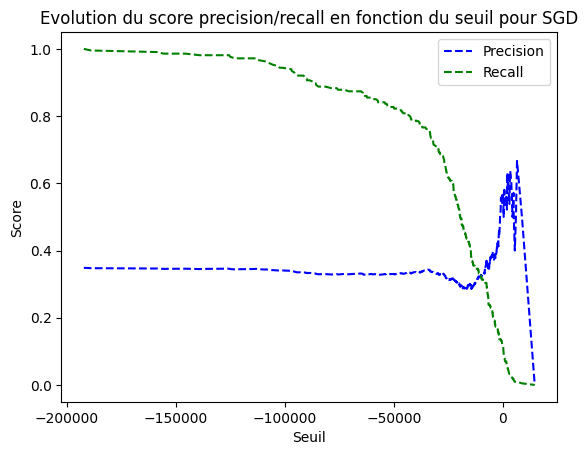

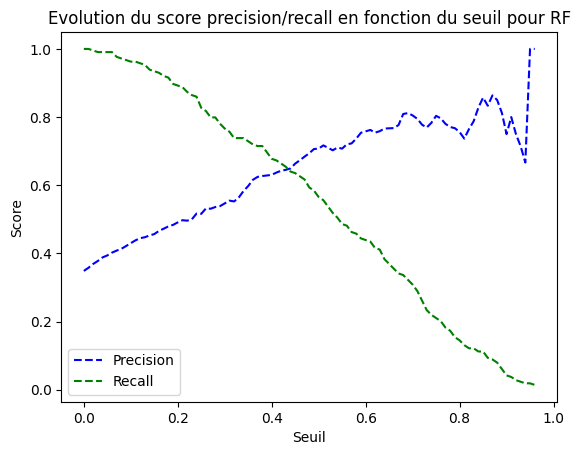

In [57]:
# Utiliser les thresholds, precisions et recall calculé
# Pour precisions et recalls ajouter [:-1] (ex precisions[:-1])

plt.plot(thresholds_sgd, precisions_sgd[:-1], "b--", label="Precision")
plt.plot(thresholds_sgd, recalls_sgd[:-1], "g--", label="Recall")
plt.title("Evolution du score precision/recall en fonction du seuil pour SGD")
plt.xlabel("Seuil")
plt.ylabel("Score")
plt.legend()
plt.show()

plt.plot(thresholds_rf, precisions_rf[:-1], "b--", label="Precision")
plt.plot(thresholds_rf, recalls_rf[:-1], "g--", label="Recall")
plt.title("Evolution du score precision/recall en fonction du seuil pour RF")
plt.xlabel("Seuil")
plt.ylabel("Score")
plt.legend()

plt.show()

Dans le cas du diagnostic du diabète, est-ce qu'on préfére maximiser le recall ou la precision ?

Dans le cas du diagnostic d'une maladie on ne souhaite surtout pas que notre modèle prédit une personne malade comme étant saine. On veut plutôt que notre modèle détecte le plus de malade possibles, quitte à augmenter le nombre de personnes saines diagnostiqués comme étant malades.

### Représenter graphiquement l'évolution de la precision en fonction du recall pour les deux modèles

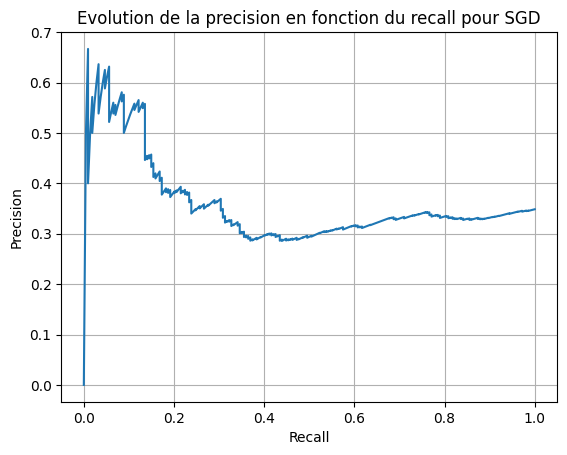

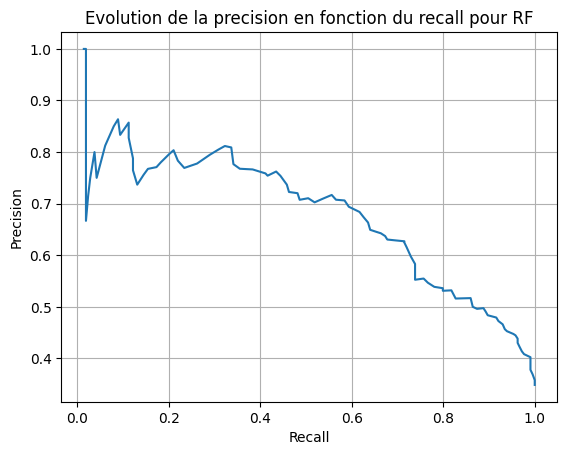

In [58]:
# Utiliser les precisions et recalls calculé
# Pour precisions et recalls ajouter [:-1] (ex precisions[:-1])

plt.plot(recalls_sgd[:-1], precisions_sgd[:-1])
plt.title("Evolution de la precision en fonction du recall pour SGD")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()

plt.plot(recalls_rf[:-1], precisions_rf[:-1])
plt.title("Evolution de la precision en fonction du recall pour RF")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()